In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
%matplotlib widget

In [3]:
FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF = [400, 450, 500, 550]

plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }

trunc_colors = {
    "NLO": "bisque",
    "N2LO": "limegreen",
    "N3LO": "dodgerblue",
    "N4LO": "red",
    "N4LO+": "black",
}

marker_common = {"markersize": 6, "elinewidth": 0.9, "capsize": 2.5}


In [4]:
# src0 = "He_photodis/newdata/"
# src = "He_photodis/HE_2"
forces = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]

## ppn

### Exclusive

In [21]:
df_3NF = pd.read_csv("./He_photodis/configurations_data.csv")
df = pd.read_csv("./He_photodis/configurations_data_2NF.csv")

In [6]:
df.head()

,I,SLANGE,CROSS,E1,E2,E3,Energy,FORCE,CUTOFF,CONFIG
0,1,0.5,7.799000e-07,39.236,0.132,52.914,100.0,N4LO,400,105_135_105_45
1,1,0.5,3.466000e-06,61.321,0.167,30.794,100.0,N4LO+,450,15_135_105_45
2,1,0.5,9.631000e-09,33.469,0.006,58.807,100.0,N4LO+,550,135_75_135_105
3,1,0.5,1.368000e-08,33.469,0.008,58.805,100.0,N4LO+,550,135_135_165_45
4,1,0.5,2.553000e-08,34.469,0.013,57.800,100.0,N4LO,450,135_15_75_165


In [7]:
configs = df["CONFIG"].unique()
configs[0]

'105_135_105_45'

In [52]:
df1 = df[df["CONFIG"] == "15_105_15_75"]
df3 = df_3NF[df_3NF["CONFIG"] == "15_105_15_75"]

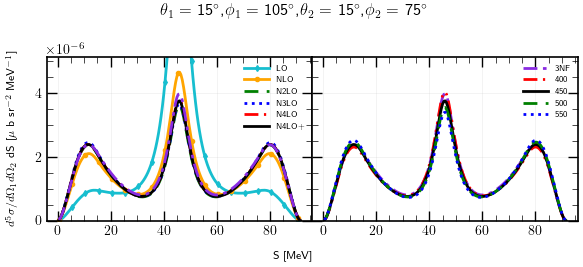

In [53]:
fig = plt.figure(figsize=(6, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
axes = gs.subplots(sharey=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")))
# fig.supylabel("d\sigma", x=0.03, y=0.6, size=12)
fig.supylabel("$d^5\sigma/d\Omega _1 d\Omega _2$ dS [$\mu$ b sr$^{-2}$ MeV$^{-1}$]", size=8)
fig.supxlabel("S [MeV]", size=8, y=0.06)

for force in FORCES:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles[force], label=force)
df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N4LO+") ]
axes[0].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles["AV18"])
axes[1].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles["AV18"], label="3NF")
for cut in CUTOFF:
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[1].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == "NLO")]["CROSS"].max()*1.1])
    ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    ax.legend(fontsize=6, handlelength=3)
plt.tight_layout()
plt.savefig(f"Figures_HE/CROSS_excl_100mev_{df1.CONFIG.values[0]}.pdf", dpi=300, facecolor="white")

In [8]:
df_tmp =  df1[(df1["FORCE"]=="N4LO+")]

NameError: name 'df1' is not defined

In [40]:
df_tmp

,I,SLANGE,CROSS,E1,E2,E3,Energy,FORCE,CUTOFF,CONFIG
158,1,0.500,2.520000e-08,34.469,0.013,57.800,100.0,N4LO,450,135_15_75_165
374,1,0.500,2.471000e-08,34.469,0.013,57.800,100.0,N2LO,450,135_15_75_165
418,1,0.500,2.564000e-08,34.469,0.013,57.800,100.0,N3LO,450,135_15_75_165
443,1,0.500,2.520000e-08,34.469,0.013,57.800,100.0,N4LO+,450,135_15_75_165
6383,2,1.005,1.063000e-07,34.972,0.053,57.257,100.0,N4LO,450,135_15_75_165
...,...,...,...,...,...,...,...,...,...,...
469805,155,77.503,2.744000e-07,0.061,48.503,43.718,100.0,N4LO+,450,135_15_75_165
470633,156,78.000,5.232000e-08,0.012,48.009,44.261,100.0,N2LO,450,135_15_75_165
470636,156,78.000,5.428000e-08,0.012,48.009,44.261,100.0,N3LO,450,135_15_75_165
470649,156,78.000,5.276000e-08,0.012,48.009,44.261,100.0,N4LO+,450,135_15_75_165


In [9]:
df_g = df.groupby(["CONFIG", "SLANGE"])["CROSS"].agg(["min", "max", "std"])

In [48]:
(df_g["max"] - df_g["min"]).groupby(level=[0]).max().sort_values(ascending=False)[:10]

CONFIG
165_165_15_15    0.000010
165_15_15_165    0.000010
15_15_165_165    0.000010
15_165_165_15    0.000010
45_75_45_105     0.000008
45_105_45_75     0.000008
75_75_75_105     0.000007
75_105_75_75     0.000007
15_105_15_75     0.000006
15_75_15_105     0.000006
dtype: float64

In [11]:
df_g.groupby(level=[0])["std"].sum().sort_values(ascending=False)

CONFIG
45_75_45_105      0.000129
45_105_45_75      0.000129
165_165_15_15     0.000111
165_15_15_165     0.000111
15_15_165_165     0.000111
                    ...   
165_135_165_45    0.000008
135_45_165_135    0.000008
135_135_165_45    0.000008
165_45_135_135    0.000008
165_135_135_45    0.000008
Name: std, Length: 216, dtype: float64